In [1]:
import cv2
import numpy as np

BLACK = (0, 0, 0)

def showImage(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.show()

In [2]:
def drawLine(image, startPoint, endPoint, color = BLACK, thickness = 5):
    cv2.line(image,
             startPoint,
             endPoint,
             color,
             thickness)

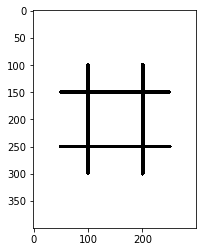

In [3]:
ticTacToeBoard = np.empty([400, 300, 3], dtype = np.uint8)
ticTacToeBoard.fill(255)

drawLine(ticTacToeBoard, (100, 100), (100, 300))
drawLine(ticTacToeBoard, (200, 100), (200, 300))
drawLine(ticTacToeBoard, (50, 150), (250, 150))
drawLine(ticTacToeBoard, (50, 250), (250, 250))

showImage(ticTacToeBoard)

In [4]:
def drawRectangleInBoard(image, posXBoard, posYBoard, color):    
    startPosX, startPosY = 50 + posXBoard * 80, 100 + posYBoard * 80
    endPosX, endPosY = 90 + posXBoard * 80, 140 + posYBoard * 80
    
    cv2.rectangle(image,
                  (startPosX, startPosY),
                  (endPosX, endPosY),
                  color,
                  -1)

In [47]:
def drawTriangleInBoard(image, posXBoard, posYBoard, color):
    startPosX, startPosY = 50 + posXBoard * 80, 100 + posYBoard * 80
    endPosX, endPosY = 90 + posXBoard * 80, 140 + posYBoard * 80
    
    vertices = np.array([[(startPosX, startPosY), (endPosX, startPosY), ((startPosX + endPosX) / 2, endPosY)]], np.int32)
    cv2.fillPoly(image,
                 vertices,
                 color)

In [53]:
EMPATE = -1
VAZIO = 0
HUMANO = 1
CPU = 2

def checkGameOver(board):

    #vitórias por linha
    if board[0][0] == board[1][0] == board[2][0] and board[0][0] != VAZIO:
        return board[0][0]
    if board[0][1] == board[1][1] == board[2][1] and board[0][1] != VAZIO:
        return board[0][1]
    if board[0][2] == board[1][2] == board[2][2] and board[0][2] != VAZIO:
        return board[0][2]
    
    #vitórias por coluna
    if board[0][0] == board[0][1] == board[0][2] and board[0][0] != VAZIO:
        return board[0][0]
    if board[1][0] == board[1][1] == board[1][2] and board[1][0] != VAZIO:
        return board[1][0]
    if board[2][0] == board[2][1] == board[2][2] and board[2][0] != VAZIO:
        return board[2][0]
    
    #vitórias por diagonal
    if board[0][0] == board[1][1] == board[2][2] and board[0][0] != VAZIO:
        return board[0][0]
    if board[2][0] == board[1][1] == board[0][2] and board[2][0] != VAZIO:
        return board[2][0]
    
    #empate
    if VAZIO not in board[0] and VAZIO not in board[1] and VAZIO not in board[2]:
        return EMPATE

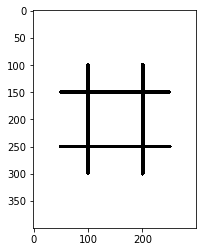

TURNO DO JOGADOR HUMANO.
Informe a posição x da sua jogada:2
Informe a posição y da sua jogada:2


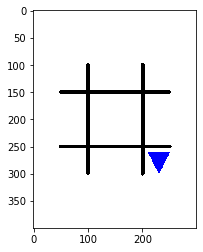

TURNO DO JOGADOR CPU.


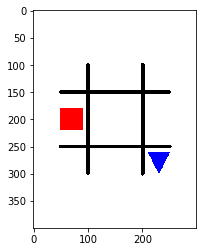

TURNO DO JOGADOR HUMANO.
Informe a posição x da sua jogada:0
Informe a posição y da sua jogada:2


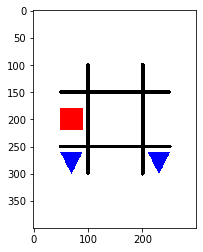

TURNO DO JOGADOR CPU.


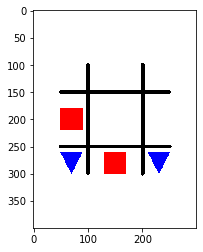

TURNO DO JOGADOR HUMANO.
Informe a posição x da sua jogada:0
Informe a posição y da sua jogada:0


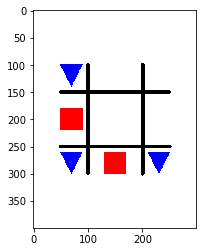

TURNO DO JOGADOR CPU.


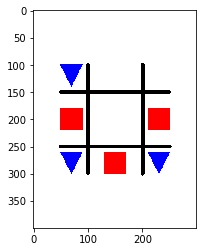

TURNO DO JOGADOR HUMANO.
Informe a posição x da sua jogada:1
Informe a posição y da sua jogada:0


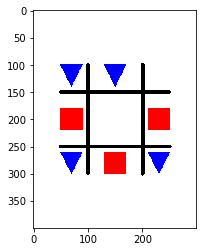

TURNO DO JOGADOR CPU.


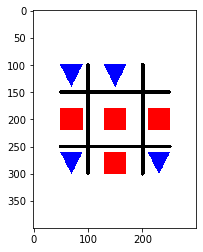

VOCÊ PERDEU!


In [56]:
currentMatch = ticTacToeBoard.copy()
showImage(currentMatch)

occupiedPositions = [[VAZIO, VAZIO, VAZIO],
                     [VAZIO, VAZIO, VAZIO],
                     [VAZIO, VAZIO, VAZIO]]
turno = HUMANO
jogadas = 0
while 1:
    if turno == HUMANO:
        print("TURNO DO JOGADOR HUMANO.")
        posX = int(input("Informe a posição x da sua jogada:")) % 3
        posY = int(input("Informe a posição y da sua jogada:")) % 3
        
        while occupiedPositions[posX][posY] != VAZIO:
            print("Posição ocupada.")
            posX = int(input("Informe a posição x da sua jogada:")) % 3
            posY = int(input("Informe a posição y da sua jogada:")) % 3
            
        occupiedPositions[posX][posY] = HUMANO
        drawTriangleInBoard(currentMatch, posX, posY, (0, 0, 255))
        turno = CPU
        
    elif turno == CPU:
        print("TURNO DO JOGADOR CPU.")
        
        import random
        posX, posY = random.randint(0, 2), random.randint(0, 2)
        while occupiedPositions[posX][posY] != VAZIO:
            posX, posY = random.randint(0, 2), random.randint(0, 2)

        occupiedPositions[posX][posY] = CPU
        drawRectangleInBoard(currentMatch, posX, posY, (255, 0, 0))
        turno = HUMANO
        
    showImage(currentMatch)
    jogadas += 1
    
    if checkGameOver(occupiedPositions) == EMPATE:
        print("EMPATE!")
        break
    elif checkGameOver(occupiedPositions) == HUMANO:
        print("VOCÊ VENCEU!")
        break
    elif checkGameOver(occupiedPositions) == CPU:
        print("VOCÊ PERDEU!")
        break
    
    #if jogadas == 2:
    #    break

#drawRectangleInBoard(currentMatch, 2, 2, (255, 0, 0))
#drawTriangleInBoard(currentMatch, 2, 1, (0, 0, 255))

#showImage(currentMatch)